In [34]:
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tensorflow.keras.regularizers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
import sklearn
import pandas as pd

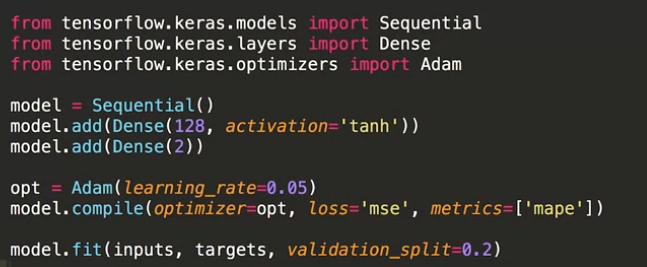

In [2]:
Image.open(r'C:\Users\44788/Desktop\it5.png')

this could be a regression model as apparent by its structure. 
mean absolute percentage error used as the metric.

lets imagine the input is stacked into a single large np array. if you specify validation_split=0.2 you are able to ley tensor flow split your data for you.
it automatically splits the input and targets for you.
models performnce is recorderded on both the test and validation sets

In [ ]:
print(history.history()) #dict_keys(['loss', 'mape', 'val_loss', 'val_mape'])

this allows you to retrieve the history of the model.

its important to note that you can explictely give the model the validation set:

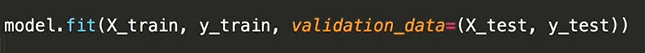

In [3]:
Image.open(r'C:\Users\44788/Desktop\it6.png')

sklearn also has a useful method for this

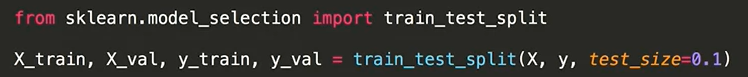

In [4]:
Image.open(r'C:\Users\44788/Desktop\it7.png')

In [15]:
from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()
print(diabetes_dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [25]:
keys = diabetes_dataset[list(diabetes_dataset.keys())[4]]

In [27]:
pd.DataFrame(data=diabetes_dataset['data'], columns = keys)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [88]:
data=diabetes_dataset['data']
targets = diabetes_dataset['target']
targets = (targets-targets.mean(axis=0))/targets.std()

In [89]:
print(min(targets), max(targets), max(targets)-min(targets))

-1.6509610124214391 2.5175590944313466 4.168520106852785


In [90]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

In [37]:
print(train_data.shape, test_data.shape)

(397, 10) (45, 10)


In [54]:
def get_model1(train_data):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid'),
    ])
    return model 

In [55]:
model = get_model1(train_data)

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               1408      
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

In [48]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [49]:
history = model.fit(train_data, train_targets,
                    epochs=100, validation_split=0.15, batch_size=64, verbose=False)

In [51]:
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.7555 - mae: 0.7170


[0.755545973777771, 0.7169652581214905]

# plot learning curves

<function matplotlib.pyplot.show(close=None, block=None)>

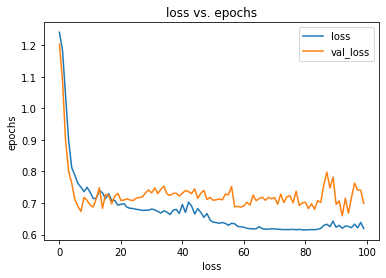

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss vs. epochs')
plt.xlabel('loss')
plt.ylabel('epochs')
plt.legend(['loss', 'val_loss'])
plt.show

# Model regularization

weight decay first 

In [60]:
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adadelta',
             loss = 'binary_crossentropy',
             metrics=['acc']) # regularization term is already specified

L2 penalizes large values of the weights and therefore makes the model find simpler function in order to fit the data. and therefore less likely to overfit.


l1 reglualrization is also an option, in this instance a sum of the absolute values are used instead of the squared valeus. l1(0.005) often used. this sparsifing some of the weights - like dropout.


l1_l2(l1=0.005, l2=0.001) can also be used. its quite typical to only apply regularization to the dense or convolutionary layer weights. however it is possible to apply it to the bias also.

In [61]:
from tensorflow.keras.regularizers import *

In [62]:
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.005, l2=0.001),
         bias_regularizer=l2(0.001)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adadelta',
             loss = 'binary_crossentropy',
             metrics=['acc']) # regularization term is already specified

dropout can be included like any other layer

In [63]:
model = Sequential([
    Dense(64, activation='relu'),
    Dropout(0.5), # applied randly across each batch
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adadelta',
             loss = 'binary_crossentropy',
             metrics=['acc'])

#however during testing you do noyt want to include dropout
# this is already handled during testing

In [91]:
# example with dropout and l2
def get_reg_model(train_data, wd, rate):
    model = Sequential([
        Dense(128, activation='relu', kernel_regularizer=l2(wd), input_shape=(train_data.shape[1],)),
        Dropout(rate), # note this is the keep probability
        Dense(128, activation='relu', kernel_regularizer=l2(wd)),
        Dropout(rate),
        Dense(128, activation='relu', kernel_regularizer=l2(wd)),
        Dropout(rate),
        Dense(128, activation='relu', kernel_regularizer=l2(wd)),
        Dropout(rate),
        Dense(128, activation='relu', kernel_regularizer=l2(wd)),
        Dropout(rate),
        Dense(128, activation='relu', kernel_regularizer=l2(wd)),
        Dropout(rate),
        Dense(1, activation='sigmoid', kernel_regularizer=l2(wd))
    ])
    return model 

In [92]:
reg_model = get_reg_model(train_data, 1e-5, 0.3)

In [93]:
reg_model.compile(optimizer='adam',
             loss = 'mse',
             metrics=['mae'])

In [94]:
reg_history = model.fit(train_data, train_targets,
                    epochs=100, validation_split=0.15, batch_size=64, verbose=False)

In [95]:
reg_model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 1.4757 - mae: 1.0726


[1.4757428169250488, 1.0726139545440674]

<function matplotlib.pyplot.show(close=None, block=None)>

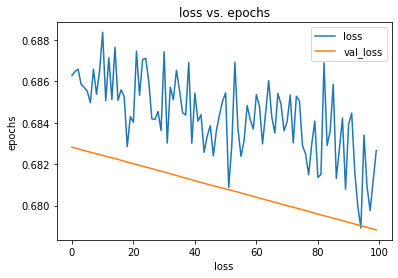

In [96]:
plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('loss vs. epochs')
plt.xlabel('loss')
plt.ylabel('epochs')
plt.legend(['loss', 'val_loss'])
plt.show

# Batch Normalisation

Stabilizes the intermediate values (and especially the later layers) in the network even with the changing inputs.

So even if the earlier layers are learning, the amount that the later layers are forced to adapt is decreased.

has a slight regularization effect.

similar to dropout it allows the weights to shrink.

In [29]:
from sklearn.model_selection import train_test_split
data = diabetes_dataset['data']
targets = diabetes_dataset['target']
targets = (targets - targets.mean(axis=0)) / (targets.std())
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

In [30]:
model = Sequential([
    Dense(64, input_shape=(train_data.shape[0],), activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    BatchNormalization(),
    Dense(256, activation='relu'),
])

In [31]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 64)                25472     
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_18 (Dense)             (None, 256)               16640     
Total params: 42,624
Trainable params: 42,368
Non-trainable params: 256
_________________________________________________________________


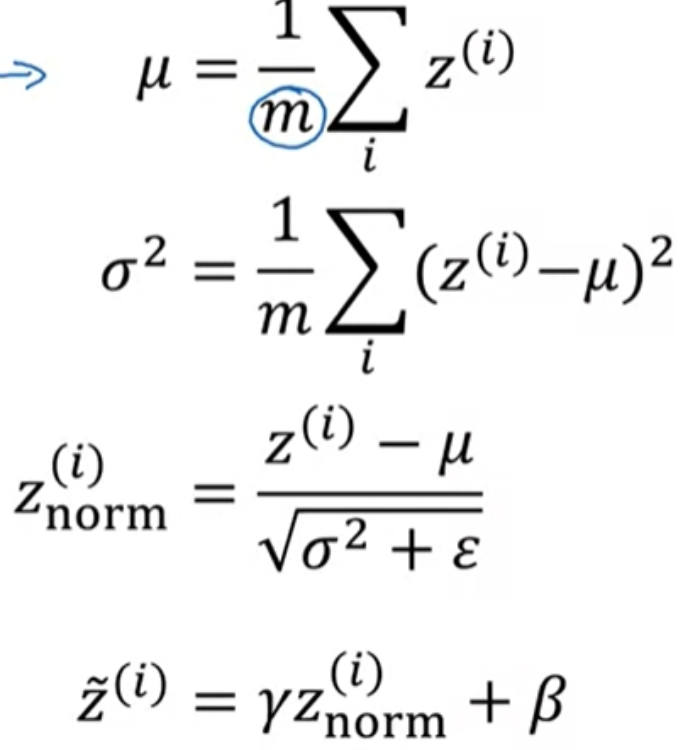

In [32]:
Image.open(r'C:\Users\44788/Desktop\it1.png')

In [33]:
# Add a customised batch normalisation layer

model.add(tf.keras.layers.BatchNormalization(
    momentum=0.95, 
    epsilon=0.005,
    axis = -1,
    beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
    gamma_initializer=tf.keras.initializers.Constant(value=0.9)
))

# Callbacks

In [36]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95): 
            print("\n Reached 99% accuracy so cancelling training!")
            self.model.stop_training = True
    # other options for when to call upon callbacks
    def on_train_begin(self, logs=None):
        pass
    def on_train_batch_begin(self, batch, logs=None):
        pass

In [ ]:
history = model.fit(x, y, epochs=5, callbacks=[myCallback()])

In [37]:
from tensorflow.keras.callbacks import *

class TrainingCallback(Callback):
    def on_train_begin(self, logs=None):
        print('starting training...')
    def on_epoch_begin(self, epoch, logs=None):
        print(f'starting epoch {epoch}')
    def on_train_batch_begin(self, batch, logs=None):
        print(f'Training: starting batch {batch}')
    def on_train_batch_end(self, batch, logs=None):
        print(f'Training: ending batch {batch}')
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95): 
            print("\n Reached 99% accuracy so cancelling training!")
            self.model.stop_training = True

In [38]:
class TestingCallback(Callback):
    def on_test_begin(self, logs=None):
        print('starting training...')
    def on_test_batch_begin(self, batch, logs=None):
        print(f'Testing: starting batch {batch}')
    def on_test_batch_end(self, batch, logs=None):
        print(f'Testing: ending batch {batch}')
    def on_test_end(self, logs=None):
        print('testing ending...')

In [ ]:
model.evaluate(test_data, test_targets, verbose=False, callbacks=[TestingCallback()])

In [39]:
class PredictionCallback(Callback):
    def on_predict_begin(self, logs=None):
        print('starting prediction...')
    def on_test_predict_begin(self, batch, logs=None):
        print(f'prediciting: starting batch {batch}')
    def on_test_predict_end(self, batch, logs=None):
        print(f'prediciting: ending batch {batch}')
    def on_prediction_end(self, logs=None):
        print('predicition ending...')

# Application - learning rate scheduler

Defining a custom callback that can change the learning rate of the optimizer of the model during training. 

do this by specifiying the epochs and the new learning rates where we would like them to be changed.

define an auxillary function that returns ther learning rate for each epoch based on our schedule

In [40]:
from sklearn.model_selection import train_test_split
data = diabetes_dataset['data']
targets = diabetes_dataset['target']
targets = (targets - targets.mean(axis=0)) / (targets.std())
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

In [41]:
model = tf.keras.Sequential([
    Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
    Dense(64,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)        
])

model.compile(loss='mse', optimizer="adam", metrics=['mae'])

In [42]:
lr_schedule = [(4, 0.03), (7, 0.02), (11, 0.005), (15, 0.007)]

def get_new_epoch_lr(epoch, lr):
    epoch_in_sched = [i for i in range(len(lr_schedule)) if lr_schedule[i][0]==int(epoch)]
    if len(epoch_in_sched)>0:
        return lr_schedule[epoch_in_sched[0]][1]
    else:
        return lr

In [43]:
class LRScheduler(Callback):
    def __init__(self, new_lr):
        super(LRScheduler, self).__init__()
        # this adds the learning rate function to our callback
        self.new_lr = new_lr
    def on_epoch_begin(self, epoch, logs=None):
        if not hasattr(self.model.optimizer, 'lr'):
              raise ValueError('Error: Optimizer does not have a learning rate.')
        curr_rate = float(tf.keras.backend.get_value(self.model.optimizer.lr))
        scheduled_rate = self.new_lr(epoch, curr_rate)
        tf.keras.backend.set_value(self.model.optimizer.lr, scheduled_rate)
        print('Learning rate for epoch {} is {:7.3f}'.format(epoch, scheduled_rate))

In [45]:
new_history = model.fit(train_data, train_targets, epochs=20,
                            batch_size=100, callbacks=[LRScheduler(get_new_epoch_lr)], verbose=False)

Learning rate for epoch 0 is   0.001
Learning rate for epoch 1 is   0.001
Learning rate for epoch 2 is   0.001
Learning rate for epoch 3 is   0.001
Learning rate for epoch 4 is   0.030
Learning rate for epoch 5 is   0.030
Learning rate for epoch 6 is   0.030
Learning rate for epoch 7 is   0.020
Learning rate for epoch 8 is   0.020
Learning rate for epoch 9 is   0.020
Learning rate for epoch 10 is   0.020
Learning rate for epoch 11 is   0.005
Learning rate for epoch 12 is   0.005
Learning rate for epoch 13 is   0.005
Learning rate for epoch 14 is   0.005
Learning rate for epoch 15 is   0.007
Learning rate for epoch 16 is   0.007
Learning rate for epoch 17 is   0.007
Learning rate for epoch 18 is   0.007
Learning rate for epoch 19 is   0.007


# Early stopping

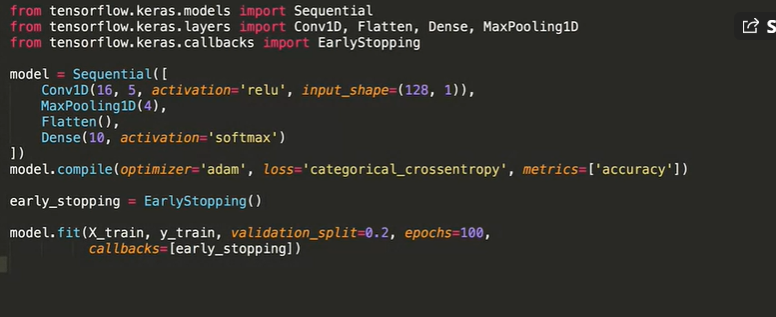

In [46]:
Image.open(r'C:\Users\44788/Desktop\it2.png')

instantiating a early stopping object. this is a specific callaback. then in callbacks list it.

it monitors the performance on the validation set. it stops depending on how the performance progresses. for example you pass in metrics to specify which metric you want to base the early stopping on

In [48]:
early_stopping = EarlyStopping(monitor='val_loss') # default

In [49]:
early_stopping = EarlyStopping(monitor='val_accuracy')

In [50]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)
#this is how many epochs of worse performance before stopping

In [51]:
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.01)
# what is considered an to be the minimum improvement in the metric 
# we are looking to measure 

In [52]:
early_stopping = EarlyStopping(monitor='val_accuracy', mode='max')
# default is auto - direction is already inferred from quantitiy name
# can expliciety state the direction 

In [105]:
from sklearn.model_selection import train_test_split
data = diabetes_dataset['data']
targets = diabetes_dataset['target']
targets = (targets - targets.mean(axis=0)) / (targets.std())
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

In [106]:
unreg_model = get_model1(train_data)
unreg_model.compile(loss='mse', optimizer="adam", metrics=['mae'])

In [107]:
unreg_history = unreg_model.fit(train_data, train_targets, epochs=100,
                            batch_size=64, 
                            verbose=False,
                            validation_split=0.15,
                            callbacks=[EarlyStopping(patience=3)])

In [108]:
unreg_model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.8393 - mae: 0.8002


[0.8393048644065857, 0.8002458214759827]

<function matplotlib.pyplot.show(close=None, block=None)>

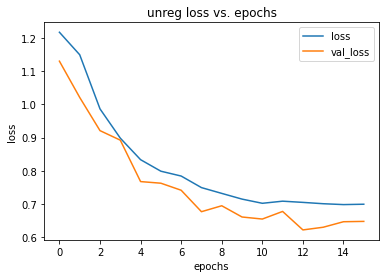

In [109]:
plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('unreg loss vs. epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['loss', 'val_loss'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

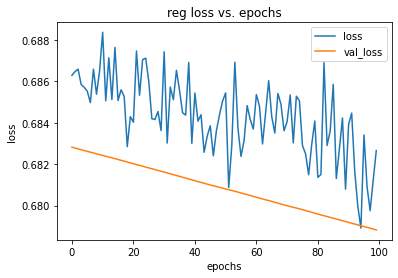

In [98]:
plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('reg loss vs. epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['loss', 'val_loss'])
plt.show

# Assignment

In [16]:
from sklearn import datasets, model_selection 
from sklearn.model_selection import train_test_split
iris_data = datasets.load_iris()

def read_in_and_split_data(iris_data):
    data = iris_data['data']
    targets = iris_data['target']
    train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)
    return train_data, test_data, train_targets, test_targets

In [17]:
train_data, test_data, train_targets, test_targets = read_in_and_split_data(iris_data)

In [18]:
# this one hot encodes things
train_targets = tf.keras.utils.to_categorical(np.array(train_targets))
test_targets = tf.keras.utils.to_categorical(np.array(test_targets))

In [21]:
def get_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape), kernel_initializer='he_uniform', bias_initializer='ones'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')
    ])
    return model 

In [22]:
model = get_model(train_data[0].shape)

In [23]:
def compile_model(model):
    opt = tf.keras.optimizers.Adam(learning_rate=0.0001) 
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
compile_model(model)

In [25]:
def train_model(model, train_data, train_targets, epochs):
    history = model.fit(train_data, train_targets, epochs=epochs, batch_size=40, validation_split=0.15, verbose=False)
    return history

In [27]:
history = train_model(model, train_data, train_targets, epochs=2)

Epoch 1/2
3/3 [==============================] - 0s 47ms/step - loss: 0.0316 - accuracy: 0.9912 - val_loss: 0.0773 - val_accuracy: 0.9524
Epoch 2/2
3/3 [==============================] - 0s 26ms/step - loss: 0.0358 - accuracy: 0.9912 - val_loss: 0.0853 - val_accuracy: 0.9524


In [30]:
def get_regularised_model(input_shape, dropout_rate, weight_decay):
    reg_model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape), kernel_initializer='he_uniform',
              bias_initializer='ones', kernel_regularizer=l2(weight_decay)),
        Dense(128, activation='relu', kernel_regularizer=l2(weight_decay)),
        Dense(128, activation='relu', kernel_regularizer=l2(weight_decay)),
        Dropout(dropout_rate),
        Dense(128, activation='relu', kernel_regularizer=l2(weight_decay)),
        Dense(128, activation='relu', kernel_regularizer=l2(weight_decay)),
        BatchNormalization(),
        Dense(64, activation='relu', kernel_regularizer=l2(weight_decay)),
        Dense(64, activation='relu', kernel_regularizer=l2(weight_decay)),
        Dropout(dropout_rate),
        Dense(64, activation='relu', kernel_regularizer=l2(weight_decay)),
        Dense(64, activation='relu', kernel_regularizer=l2(weight_decay)),
        Dense(3, activation='softmax')
    ])
    return reg_model 

In [31]:
reg_model = get_regularised_model(train_data[0].shape, 0.3, 0.001)
compile_model(reg_model)
reg_history = train_model(reg_model, train_data, train_targets, epochs=2)

Epoch 1/2
3/3 [==============================] - 1s 142ms/step - loss: 2.0269 - accuracy: 0.3155 - val_loss: 1.9813 - val_accuracy: 0.1905
Epoch 2/2
3/3 [==============================] - 0s 30ms/step - loss: 2.0273 - accuracy: 0.3492 - val_loss: 1.9786 - val_accuracy: 0.1905


In [35]:
def get_callbacks():
    early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=30)
    learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=20)
    return early_stopping, learning_rate_reduction

In [36]:
call_model = get_regularised_model(train_data[0].shape, 0.3, 0.0001)
compile_model(call_model)
early_stopping, learning_rate_reduction = get_callbacks()
call_history = call_model.fit(train_data, train_targets, epochs=800, validation_split=0.15,
                         callbacks=[early_stopping, learning_rate_reduction], verbose=0)

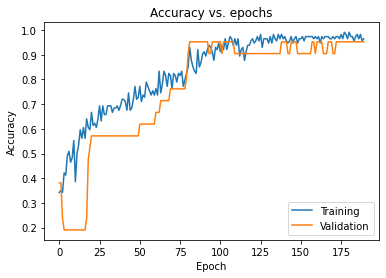

In [37]:
try:
    plt.plot(call_history.history['accuracy'])
    plt.plot(call_history.history['val_accuracy'])
except KeyError:
    plt.plot(call_history.history['acc'])
    plt.plot(call_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

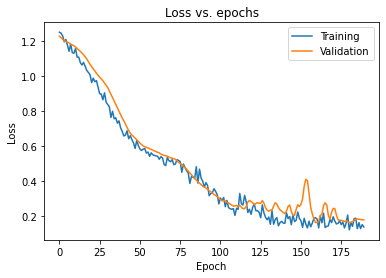

In [38]:
plt.plot(call_history.history['loss'])
plt.plot(call_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [39]:
test_loss, test_acc = call_model.evaluate(test_data, test_targets, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 0.182
Test accuracy: 93.33%
